In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Module 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [7]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])
categorical_data = df.select_dtypes(include=['object'])

print("Numerical Columns:", numerical_data.columns.tolist())
print("Categorical Columns:", categorical_data.columns.tolist())

Numerical Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [10]:
print(df.isnull().sum())

df.fillna({'Age':df['Age'].mean()}, inplace = True)
df.dropna(subset=['Embarked'], inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


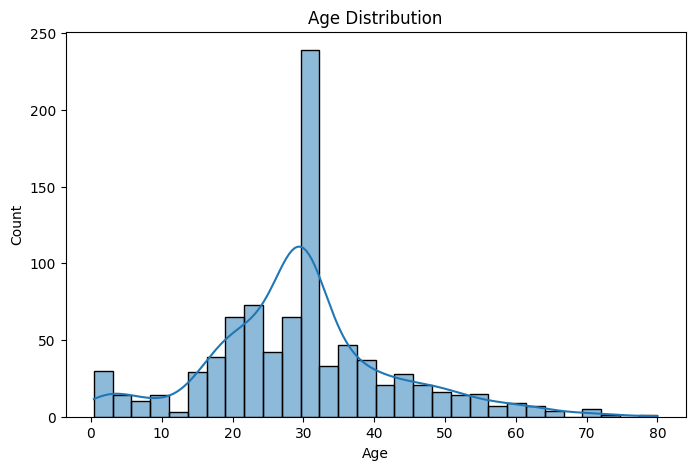

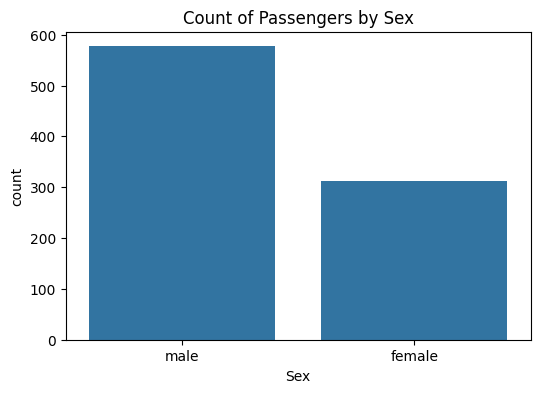

In [12]:
# Software tools

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df)
plt.title('Count of Passengers by Sex')
plt.show()

## Module 2

In [14]:
# Check for duplicates in the dataset
print("Number of duplicate rows:", df.duplicated().sum())

# Drop duplicate rows if any
data_dedup = df.drop_duplicates()
print("Number of rows after deduplication:", len(data_dedup))

Number of duplicate rows: 0
Number of rows after deduplication: 889


In [15]:
# Replace 'Sex' with numerical values
data_dedup['Sex'] = data_dedup['Sex'].replace({'male': 1, 'female': 0})
print(data_dedup[['Sex']].head())

   Sex
0    1
1    0
2    0
3    0
4    1


<ipython-input-15-593cb8607178>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_dedup['Sex'] = data_dedup['Sex'].replace({'male': 1, 'female': 0})


In [16]:
# Create more detailed age bins
bins = [0, 5, 12, 18, 25, 35, 45, 60, 80, 100]
labels = ['Infant', 'Child', 'Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior Adult', 'Senior', 'Elder']
data_dedup['AgeGroup'] = pd.cut(data_dedup['Age'], bins=bins, labels=labels)

# Display the distribution of age groups
print(data_dedup['AgeGroup'].value_counts())

AgeGroup
Adult           373
Young Adult     162
Middle Aged     113
Senior Adult     81
Teen             70
Infant           44
Child            25
Senior           21
Elder             0
Name: count, dtype: int64


In [18]:
print(data_dedup.isnull().sum())
data_no_na = data_dedup.dropna()
data_dedup.fillna({'Age':data_dedup['Age'].mean()}, inplace = True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
AgeGroup         0
dtype: int64


In [20]:
from scipy.stats import norm

age_data = data_dedup['Age'].dropna()
mean, std_dev = norm.fit(age_data)
data_dedup.fillna({'Age':mean}, inplace = True)
print("Filled missing values in 'Age' with MLE estimated mean:", mean)

Filled missing values in 'Age' with MLE estimated mean: 29.65344637067425


## Module 3

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
iris = sns.load_dataset('iris')

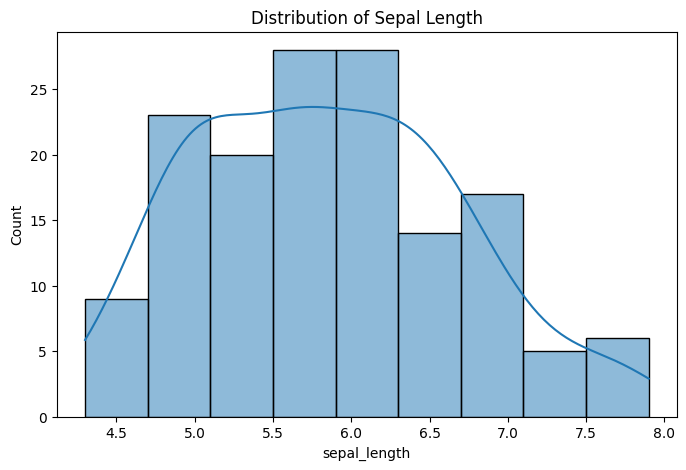

In [23]:
# Univariate analysis
plt.figure(figsize=(8, 5))
sns.histplot(iris['sepal_length'], kde=True)
plt.title('Distribution of Sepal Length')
plt.show()

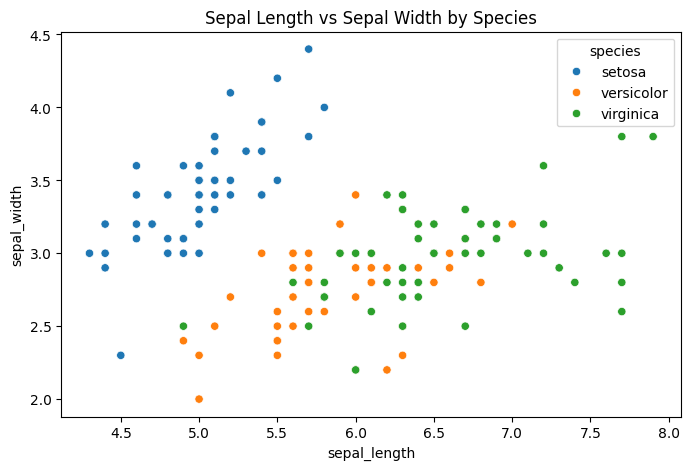

In [24]:
# Bivariate analysis: Scatter plot of Sepal Length vs. Sepal Width
plt.figure(figsize=(8, 5))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.title('Sepal Length vs Sepal Width by Species')
plt.show()

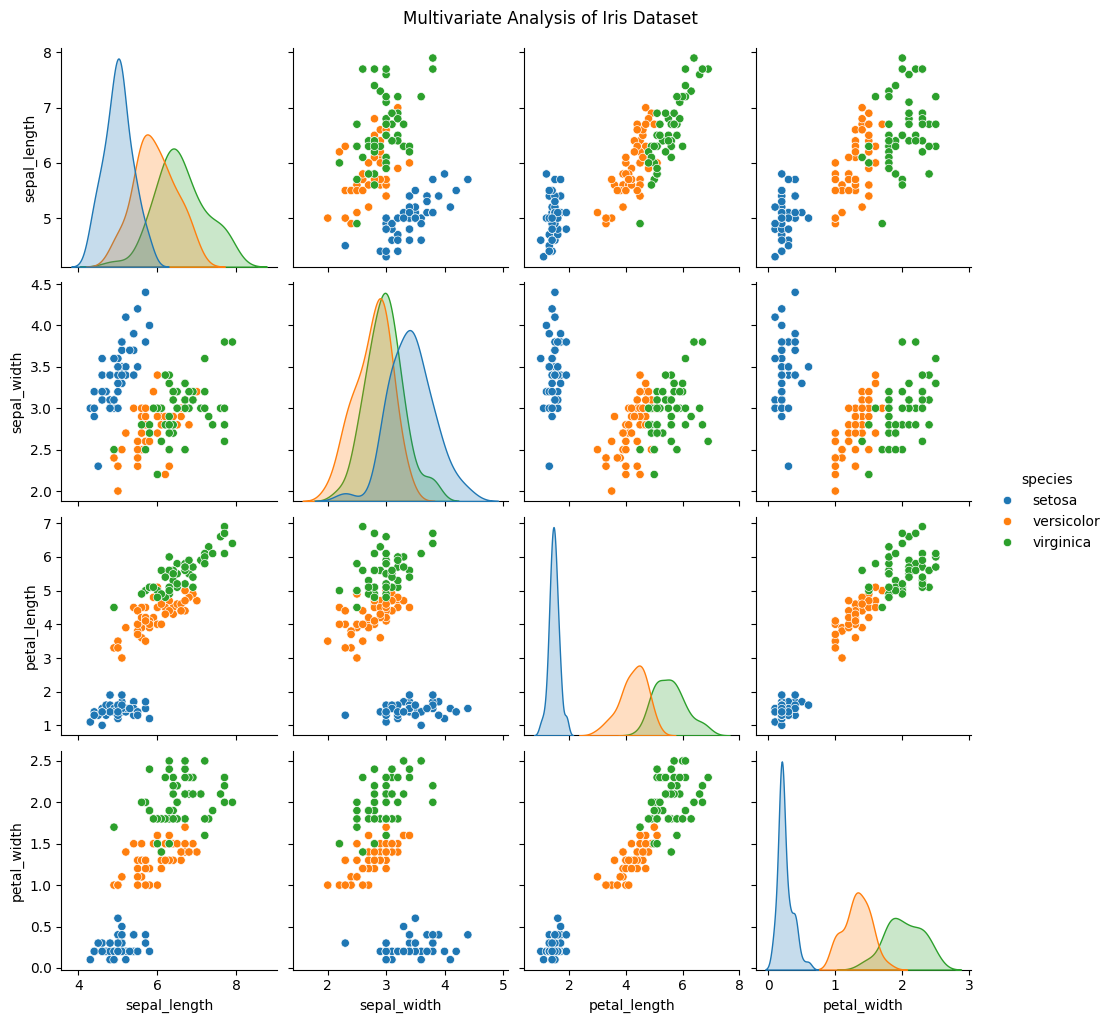

In [25]:
# Multivariate analysis: Pairplot across multiple features
sns.pairplot(iris, hue='species')
plt.suptitle('Multivariate Analysis of Iris Dataset', y=1.02)
plt.show()

In [26]:
import pandas as pd

# Load the AirPassengers dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
print(data.head())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


In [27]:
data.index = pd.to_datetime(data.index)
print(data.index)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)


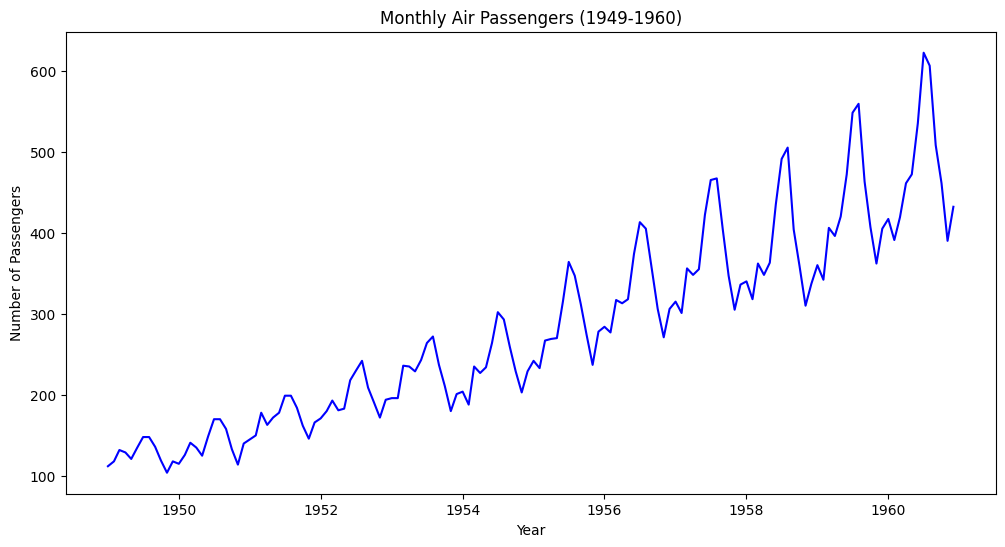

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Passengers'], color='blue')
plt.title('Monthly Air Passengers (1949-1960)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

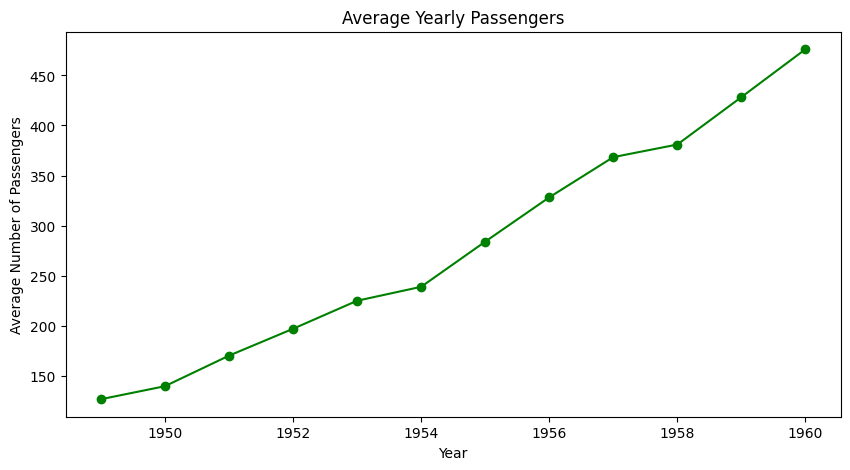

In [29]:
data['Year'] = data.index.year
yearly_data = data.groupby('Year')['Passengers'].mean()

plt.figure(figsize=(10, 5))
plt.plot(yearly_data.index, yearly_data.values, marker='o', color='green')
plt.title('Average Yearly Passengers')
plt.xlabel('Year')
plt.ylabel('Average Number of Passengers')
plt.show()

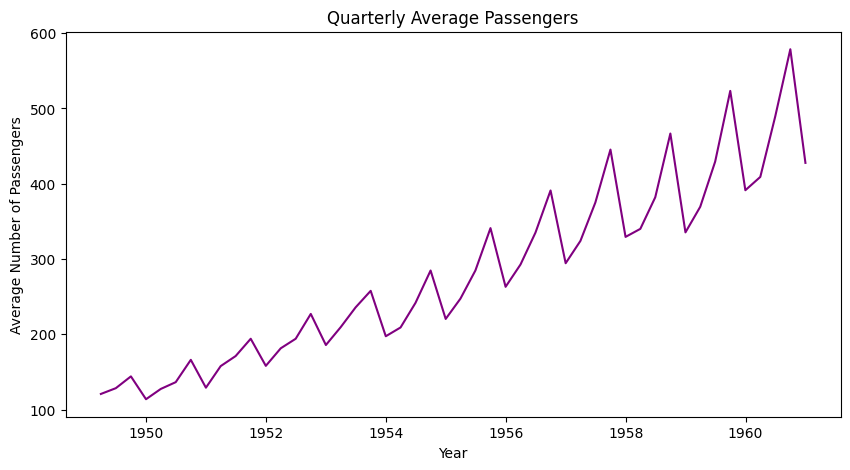

In [31]:
quarterly_data = data['Passengers'].resample('QE').mean()

plt.figure(figsize=(10, 5))
plt.plot(quarterly_data.index, quarterly_data.values, color='purple')
plt.title('Quarterly Average Passengers')
plt.xlabel('Year')
plt.ylabel('Average Number of Passengers')
plt.show()

## Module 4

In [32]:
summary = iris.describe()
print(summary)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [33]:
sepal_length_mean = iris['sepal_length'].mean()
sepal_length_std = iris['sepal_length'].std()

print("Mean of Sepal Length:", sepal_length_mean)
print("Standard Deviation of Sepal Length:", sepal_length_std)

Mean of Sepal Length: 5.843333333333334
Standard Deviation of Sepal Length: 0.8280661279778629


In [34]:
correlation = iris['sepal_length'].corr(iris['petal_length'])
print("Correlation between Sepal Length and Petal Length:", correlation)

Correlation between Sepal Length and Petal Length: 0.8717537758865831


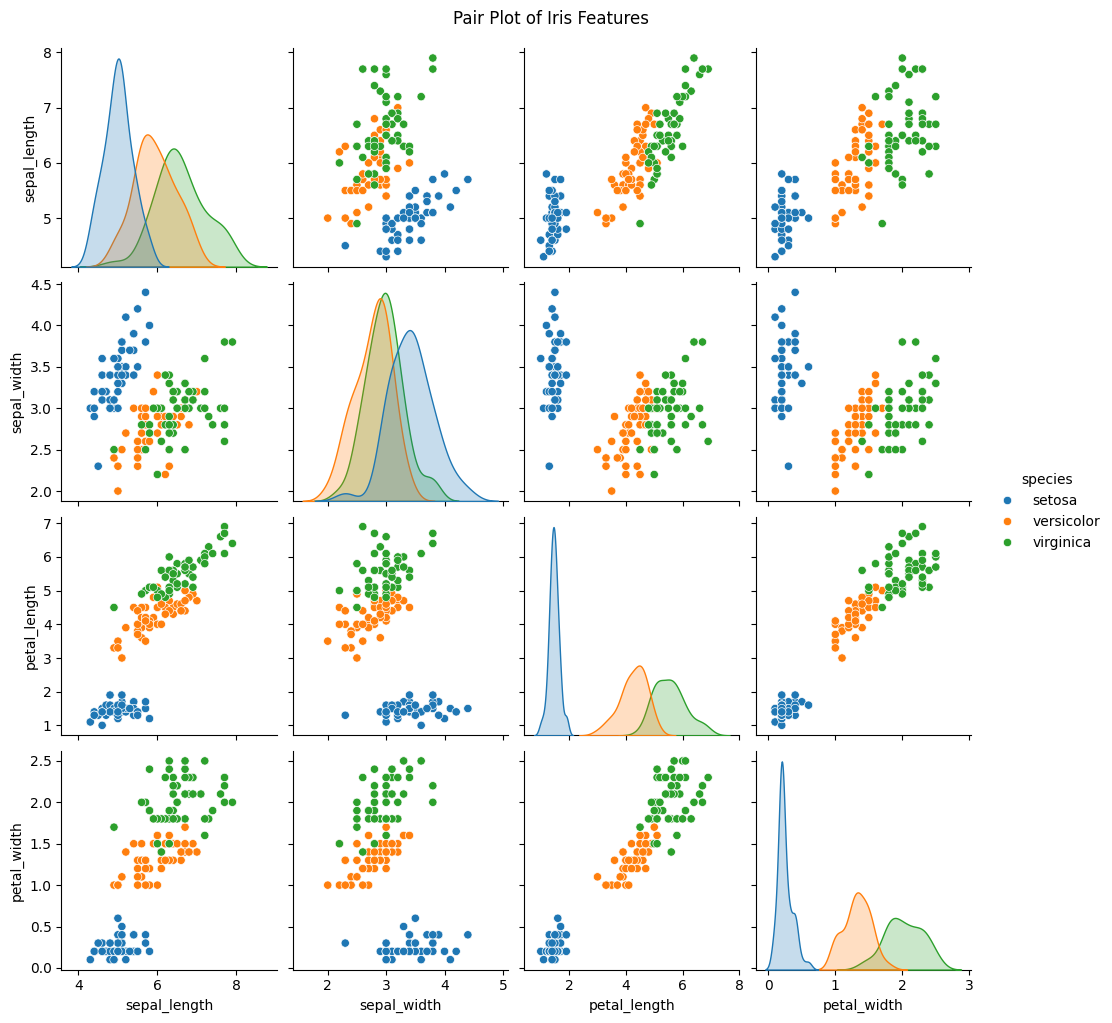

In [35]:
sns.pairplot(iris, hue='species')
plt.suptitle('Pair Plot of Iris Features', y=1.02)
plt.show()

In [36]:
contingency_table = pd.crosstab(index=iris['species'], columns='count')
print(contingency_table)

col_0       count
species          
setosa         50
versicolor     50
virginica      50


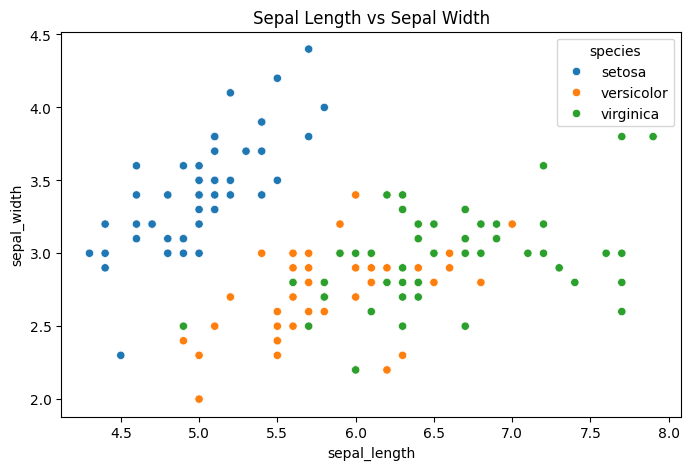

In [37]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.title('Sepal Length vs Sepal Width')
plt.show()

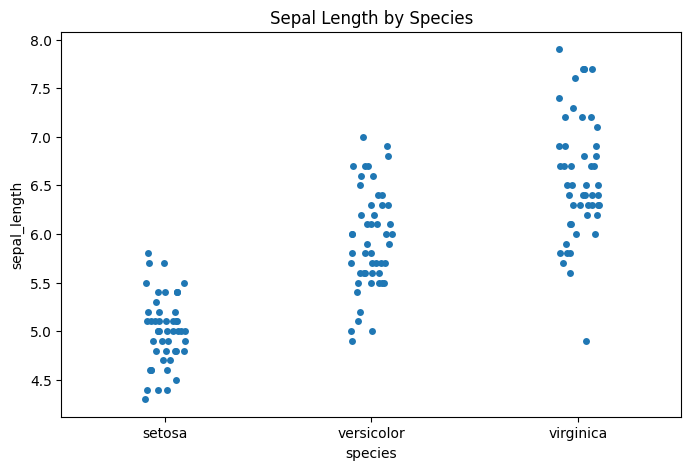

In [38]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='species', y='sepal_length', data=iris, jitter=True)
plt.title('Sepal Length by Species')
plt.show()

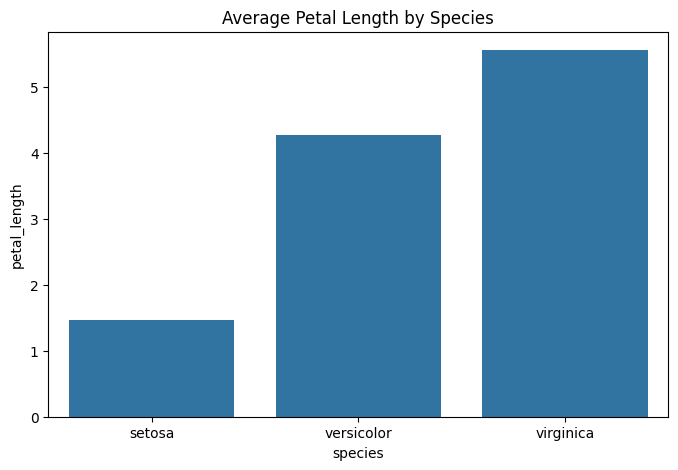

In [39]:
avg_petal_length = iris.groupby('species')['petal_length'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='species', y='petal_length', data=avg_petal_length)
plt.title('Average Petal Length by Species')
plt.show()

## Module 5

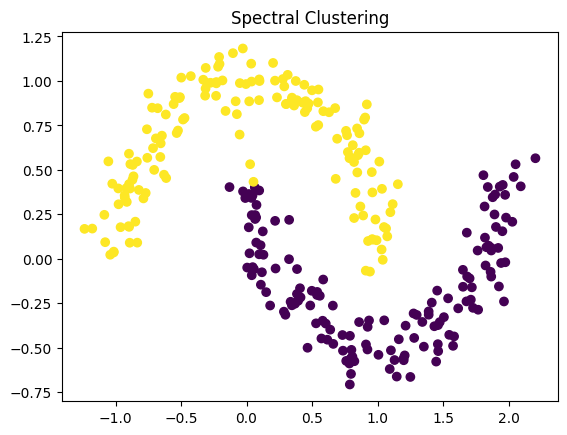

In [40]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.1)

spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=10)
labels = spectral.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Spectral Clustering')
plt.show()

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

documents = [
    "NASA's Mars rovers are equipped with high-resolution cameras to capture detailed images of the planet's surface.",
    "SpaceX plans to send humans to Mars as part of its long-term goal to make life multi-planetary.",
    "The Hubble Space Telescope has provided unprecedented views of distant galaxies and nebulae.",
    "Astronauts aboard the International Space Station conduct scientific experiments that impact life on Earth.",
    "The search for extraterrestrial life involves studying the conditions on exoplanets in the habitable zone.",
    "NASA recently launched a mission to explore Jupiter's moons, focusing on the potential for life beneath their icy surfaces."
]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

for i, doc in enumerate(documents):
    print(f"Document {i+1} - Cluster {labels[i]}: {doc}")

Document 1 - Cluster 1: NASA's Mars rovers are equipped with high-resolution cameras to capture detailed images of the planet's surface.
Document 2 - Cluster 1: SpaceX plans to send humans to Mars as part of its long-term goal to make life multi-planetary.
Document 3 - Cluster 0: The Hubble Space Telescope has provided unprecedented views of distant galaxies and nebulae.
Document 4 - Cluster 0: Astronauts aboard the International Space Station conduct scientific experiments that impact life on Earth.
Document 5 - Cluster 1: The search for extraterrestrial life involves studying the conditions on exoplanets in the habitable zone.
Document 6 - Cluster 1: NASA recently launched a mission to explore Jupiter's moons, focusing on the potential for life beneath their icy surfaces.


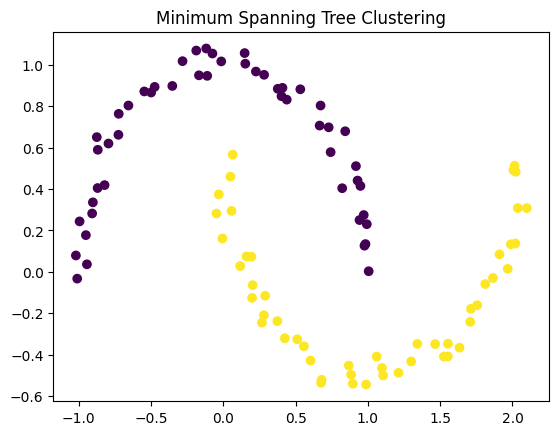

In [42]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.sparse.csgraph import minimum_spanning_tree
import numpy as np

X, _ = make_moons(n_samples=100, noise=0.05)

dist_matrix = pdist(X, metric='euclidean')
link = linkage(dist_matrix, method='single')
labels = fcluster(link, t=0.3, criterion='distance')

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Minimum Spanning Tree Clustering')
plt.show()

In [43]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

gmm = GaussianMixture(n_components=3, random_state=0)
labels = gmm.fit_predict(X)

print("GMM Cluster Labels:", labels)

GMM Cluster Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


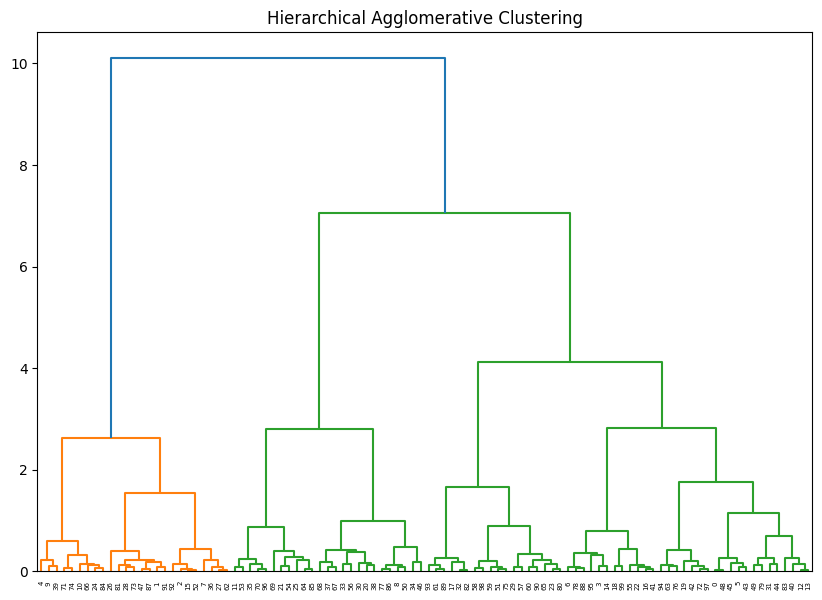

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage

X, _ = make_moons(n_samples=100, noise=0.1)

link = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(link)
plt.title('Hierarchical Agglomerative Clustering')
plt.show()

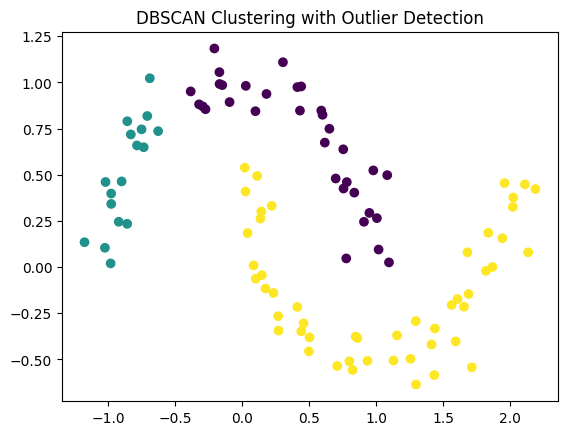

In [45]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering with Outlier Detection')
plt.show()

## Module 6

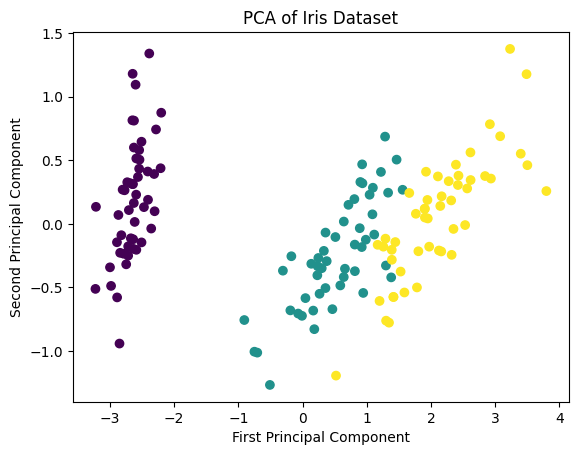

In [46]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis')
plt.title('PCA of Iris Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [47]:
import numpy as np
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

U, S, Vt = np.linalg.svd(A)

print("U matrix:\n", U)
print("Singular values:\n", S)
print("Vt matrix:\n", Vt)

U matrix:
 [[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]
Singular values:
 [1.68481034e+01 1.06836951e+00 4.41842475e-16]
Vt matrix:
 [[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]


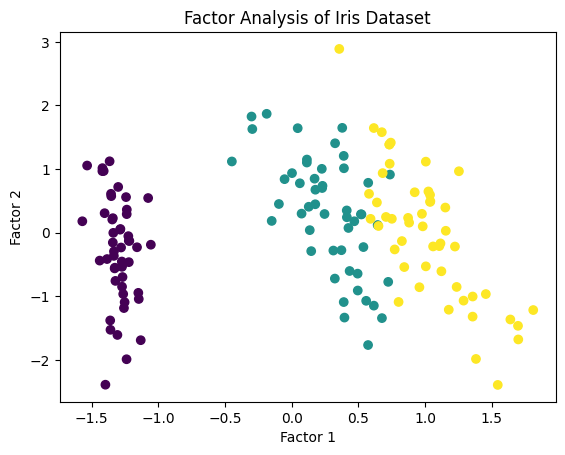

In [48]:
from sklearn.decomposition import FactorAnalysis
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X)
plt.scatter(X_fa[:, 0], X_fa[:, 1], c=iris.target, cmap='viridis')
plt.title('Factor Analysis of Iris Dataset')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()

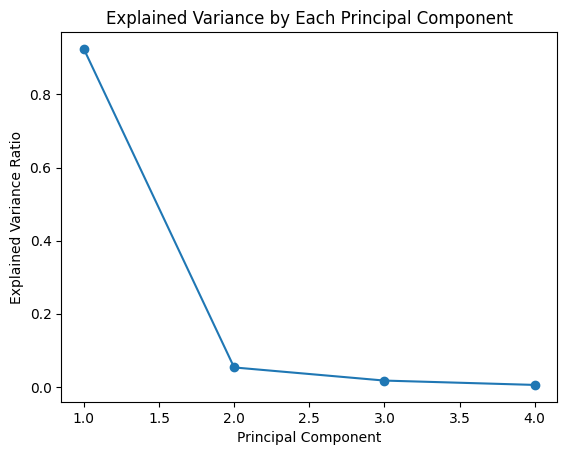

In [49]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

pca = PCA()
pca.fit(X)

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

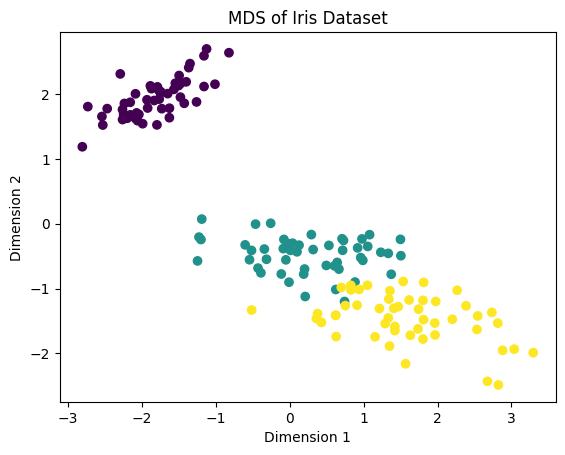

In [50]:
from sklearn.manifold import MDS

iris = load_iris()
X = iris.data

mds = MDS(n_components=2)
X_mds = mds.fit_transform(X)

plt.scatter(X_mds[:, 0], X_mds[:, 1], c=iris.target, cmap='viridis')
plt.title('MDS of Iris Dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

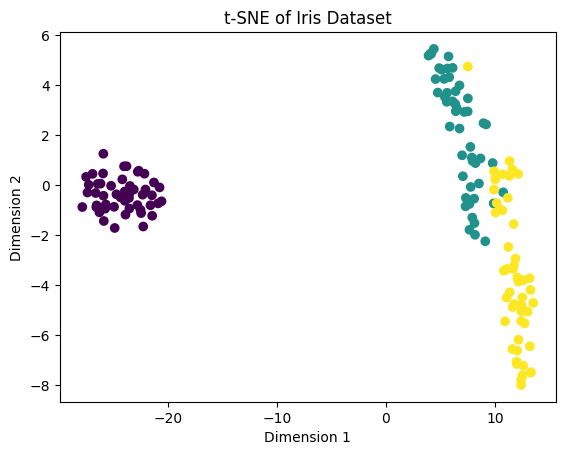

In [51]:
from sklearn.manifold import TSNE

iris = load_iris()
X = iris.data

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target, cmap='viridis')
plt.title('t-SNE of Iris Dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [53]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=313d689595800810885690904ed2944de644a6052ba1f3bb082dcd9c7988d5b0
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


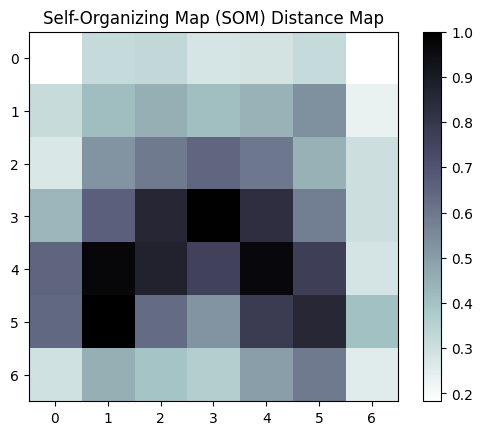

In [54]:
from minisom import MiniSom
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
X = iris.data

som = MiniSom(7, 7, X.shape[1], sigma=1.0, learning_rate=0.5)
som.train_random(X, 100)

plt.imshow(som.distance_map().T, cmap='bone_r')
plt.title('Self-Organizing Map (SOM) Distance Map')
plt.colorbar()
plt.show()

## Module 7

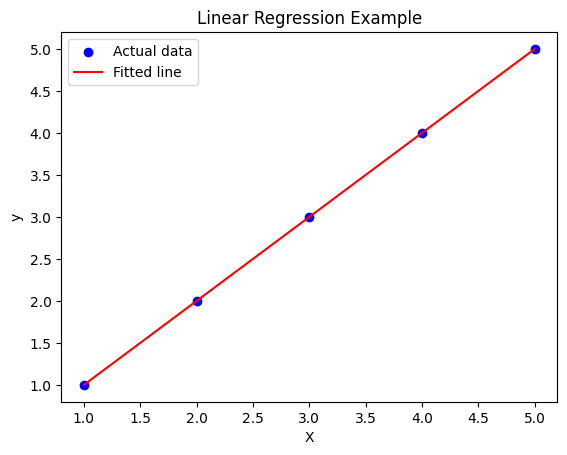

Slope: [1.]
Intercept: 0.0


In [55]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 2, 3, 4, 5])

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Fitted line')
plt.title('Linear Regression Example')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

In [56]:
# Reinforcement Learning
import numpy as np
import random

grid = np.array([
    [0, 0, 0, -1, 0],
    [0, -1, 0, -1, 0],
    [0, -1, 0, 0, 0],
    [0, 0, 0, -1, 1]
])

q_table = np.zeros((4, 5, 4))

actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.2
episodes = 1000

def valid_move(x, y):
    if 0 <= x < grid.shape[0] and 0 <= y < grid.shape[1] and grid[x, y] != -1:
        return True
    return False

for _ in range(episodes):
    x, y = 0, 0
    while (x, y) != (3, 4):
        if random.uniform(0, 1) < epsilon:
            action = random.choice(range(4))
        else:
            action = np.argmax(q_table[x, y])

        dx, dy = actions[action]
        new_x, new_y = x + dx, y + dy

        if valid_move(new_x, new_y):
            reward = 1 if (new_x, new_y) == (3, 4) else 0
            q_table[x, y, action] = q_table[x, y, action] + learning_rate * (reward + discount_factor * np.max(q_table[new_x, new_y]) - q_table[x, y, action])
            x, y = new_x, new_y

print("Q-table after training:")
print(q_table)

x, y = 0, 0
path = [(x, y)]
while (x, y) != (3, 4):
    action = np.argmax(q_table[x, y])
    dx, dy = actions[action]
    x, y = x + dx, y + dy
    path.append((x, y))

print("Path to goal:", path)

Q-table after training:
[[[0.         0.34612111 0.         0.43046721]
  [0.38710389 0.05218105 0.         0.        ]
  [0.19325748 0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.21562702]]

 [[0.         0.         0.38693929 0.4782969 ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.0099475  0.72434039]
  [0.         0.         0.         0.        ]
  [0.         0.         0.01998514 0.89786437]]

 [[0.         0.         0.42820003 0.531441  ]
  [0.         0.         0.         0.        ]
  [0.         0.81       0.63138754 0.65601787]
  [0.72415378 0.9        0.         0.        ]
  [0.80898627 0.         0.79584467 1.        ]]

 [[0.         0.59049    0.47747237 0.        ]
  [0.53092802 0.6561     0.         0.        ]
  [0.5897288  0.         0.729      0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]]
Path to 